https://newtechaudit.ru/gruppirovka-klasterizaczia/

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [13]:
import pandas as pd
from sklearn.datasets import make_blobs

df = pd.read_csv('WineQT.csv')

data = df[df['quality'].isin([5,6,7])]
data = data[['volatile acidity', 'total sulfur dioxide', 'sulphates','alcohol', 'quality']]
data['quality'] = data['quality']

pregenerated = data.pop('quality')

result_df = data.copy()

In [8]:
print(result_df)

      volatile acidity  total sulfur dioxide  sulphates  alcohol
0                0.700                  34.0       0.56      9.4
1                0.880                  67.0       0.68      9.8
2                0.760                  54.0       0.65      9.8
3                0.280                  60.0       0.58      9.8
4                0.700                  34.0       0.56      9.4
...                ...                   ...        ...      ...
1138             0.510                  40.0       0.75     11.0
1139             0.620                  38.0       0.82      9.5
1140             0.600                  44.0       0.58     10.5
1141             0.550                  51.0       0.76     11.2
1142             0.645                  44.0       0.71     10.2

[1088 rows x 4 columns]


5    483
6    462
7    143
Name: quality, dtype: int64

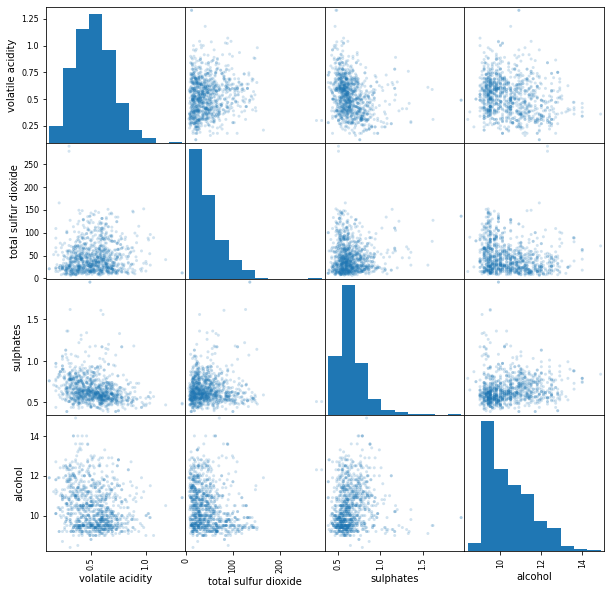

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(result_df, alpha=0.2, figsize=(10, 10), )
pd.Series(pregenerated).value_counts()

In [15]:
result_df["group"] = pregenerated
result_df.head()

volatile acidity  total sulfur dioxide  sulphates  alcohol  group
0              0.70                  34.0       0.56      9.4      5
1              0.88                  67.0       0.68      9.8      5
2              0.76                  54.0       0.65      9.8      5
3              0.28                  60.0       0.58      9.8      6
4              0.70                  34.0       0.56      9.4      5

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(data)

In [19]:
result_df["predicted"] = kmeans.labels_
print(result_df["group"].value_counts())
print(result_df["predicted"].value_counts())
result_df.head()

5    483
6    462
7    143
Name: group, dtype: int64
2    568
0    364
1    156
Name: predicted, dtype: int64


volatile acidity  total sulfur dioxide  sulphates  alcohol  group  \
0              0.70                  34.0       0.56      9.4      5   
1              0.88                  67.0       0.68      9.8      5   
2              0.76                  54.0       0.65      9.8      5   
3              0.28                  60.0       0.58      9.8      6   
4              0.70                  34.0       0.56      9.4      5   

   предсказанные  predicted  
0              2          2  
1              0          0  
2              0          0  
3              0          0  
4              2          2

In [20]:
temp = result_df["predicted"].map({2:0,0:1,1:2}) - result_df["group"]
temp.value_counts(normalize=True)

-5    0.357537
-6    0.275735
-4    0.170956
-3    0.107537
-7    0.088235
dtype: float64

In [21]:
tsne_data = (data - data.mean())/data.std()
tsne_df = TSNE(n_components=2,perplexity=20).fit_transform(tsne_data)
result_df["tsneX"] = tsne_df[:,0]
result_df["tsneY"] = tsne_df[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


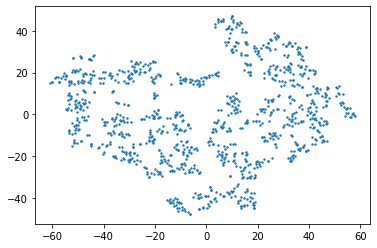

In [22]:

plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,) 
plt.savefig("blobs_gray.jpg",dpi=1200,transparent=True)

In [24]:

result_df[(result_df['tsneX']>15) & (result_df['tsneY']<5)]["group"].value_counts()

6    124
7     46
5     34
Name: group, dtype: int64

In [26]:
def colorer(row,column):
    if row[column] == 1:
        return "Green"
    if row[column] == 2:
        return "Brown"    
    return "Magenta"

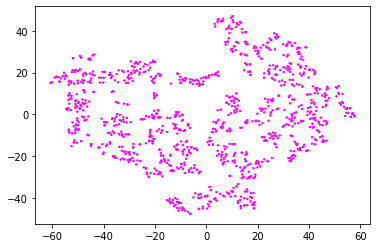

In [27]:
result_df["color"] = result_df.apply(colorer,axis = 1,column = "group")
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=2,c=list(result_df['color'])) 
plt.savefig("blobs_colored.jpg",dpi=1200,transparent=True)

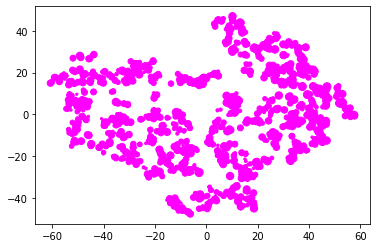

In [28]:
result_df["activity"] = np.random.randint(1,10, len(result_df))*(result_df["group"]+0.1)
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=list(result_df['activity']),c=list(result_df['color'])) 
plt.savefig("blobs_size.jpg",dpi=1200,transparent=True)

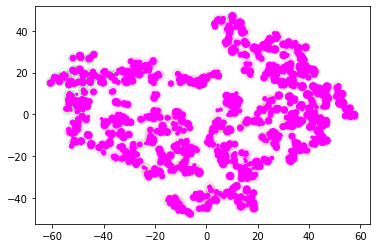

In [29]:
result_df["background"] = result_df.apply(colorer,axis = 1,column = "predicted")
plt.scatter(result_df["tsneX"], result_df["tsneY"],s = 100, c=list(result_df['background'])
                ,marker = "o",alpha = 0.05)
plt.scatter(result_df["tsneX"], result_df["tsneY"],s=list(result_df['activity']),c=list(result_df['color'])) 
plt.savefig("blobs_background.jpg",dpi=1200,transparent=True)

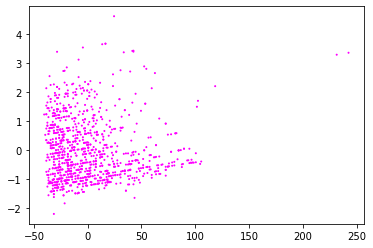

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
result_df['pcaX']  = principalComponents[:,0]
result_df['pcaY']  = principalComponents[:,1]
plt.scatter(result_df['pcaX'] , result_df['pcaY'],s = 1, c=list(result_df['color']),marker = "o",)
plt.show()

In [31]:
result_df.head(50)

volatile acidity  total sulfur dioxide  sulphates  alcohol  group  \
0              0.700                  34.0       0.56      9.4      5   
1              0.880                  67.0       0.68      9.8      5   
2              0.760                  54.0       0.65      9.8      5   
3              0.280                  60.0       0.58      9.8      6   
4              0.700                  34.0       0.56      9.4      5   
5              0.660                  40.0       0.56      9.4      5   
6              0.600                  59.0       0.46      9.4      5   
7              0.650                  21.0       0.47     10.0      7   
8              0.580                  18.0       0.57      9.5      7   
9              0.580                  65.0       0.54      9.2      5   
10             0.615                  59.0       0.52      9.9      5   
11             0.610                  29.0       1.56      9.1      5   
12             0.280                 103.0       0.75     10.5      7   
13             0.320                  56.0       1.08      9.2      6   
14             0.390                  71.0       0.65      9.7      5   
15             0.430                  37.0       0.91      9.5      5   
16             0.490                  67.0       0.53      9.4      5   
17             0.400                  40.0       0.63      9.7      6   
18             0.390                  23.0       0.56      9.3      5   
19             0.410                  11.0       0.59      9.5      5   
20             0.710                  35.0       0.55      9.4      5   
21             0.645                  16.0       0.59      9.8      6   
22             0.675                  82.0       0.54     10.1      5   
23             0.655                 113.0       0.66      9.8      5   
24             0.320                  50.0       0.55      9.2      5   
25             0.645                  18.0       0.55      9.6      6   
26             0.600                  15.0       0.60     10.8      6   
27             0.380                  30.0       0.73      9.7      7   
28             0.450                  87.0       0.83     10.5      5   
30             0.490                  14.0       0.90     10.5      6   
31             0.660                  23.0       1.20     10.3      5   
33             0.935                 114.0       0.73      9.2      5   
34             0.660                  23.0       0.74      9.2      5   
35             0.520                  15.0       0.63      9.4      6   
36             0.500                  14.0       0.64      9.4      6   
37             0.380                 119.0       0.56      9.4      5   
38             0.510                  73.0       0.63     10.2      6   
39             0.420                  10.0       0.63      9.6      5   
40             0.590                  54.0       0.59     10.0      5   
41             0.390                  46.0       0.54      9.4      6   
42             0.400                  52.0       0.64      9.2      5   
43             0.690                 112.0       0.71      9.3      5   
44             0.735                  54.0       0.57      9.8      5   
45             0.725                  11.0       0.39     10.9      5   
46             0.725                  11.0       0.39     10.9      5   
47             0.705                  15.0       0.58     10.7      5   
48             0.705                  19.0       0.95     10.5      6   
49             0.690                  94.0       0.48      9.5      5   
51             0.410                  42.0       0.66     10.5      5   
52             0.785                  30.0       0.55     10.7      6   

    предсказанные  predicted      tsneX      tsneY    color  activity  \
0               2          2 -29.897840 -21.513010  Magenta      45.9   
1               0          0 -44.955635 -15.059229  Magenta      35.7   
2               0          0 -41.667072 -15.849773  Magenta  